Putting NMF, KNN clustering, PCA and related tools to use for analyzing the fashion MNIST dataset. We want to do classification as well as regeneration.

First we must import tensorflow's NMF module and numpy, as well as pandas for the df's, and matplotlib for the plottt. And sklearn for that sweet PCA, but will import when it is needed.

In [35]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  


mnist_train = pd.read_csv("/Users/oliviagallup/Downloads/fashionmnist/fashion-mnist_train.csv")
mnist_test = pd.read_csv("/Users/oliviagallup/Downloads/fashionmnist/fashion-mnist_test.csv")

# mnist_train.head()

We can see that the MNIST Data has already been split into train and test. We also know that the classification of the pictures is marked from 0-9 in the first column "label". We wanna split it up therefore into input and output.

In [36]:
x_train = mnist_train.iloc[:, 1:]   # Removing the "label" column 
y_train = mnist_train.iloc[:, [0]]   # The 0 is in [] to keep df type, else y_train would be a Series :(

x_test = mnist_test.iloc[:, 1:]
y_test = mnist_test.iloc[:, [0]]

Now we have our train and test sets and we will do some PCA decomposition as an initial test.

In [37]:
from sklearn.decomposition import PCA

pca = PCA(random_state=0, whiten=True)  # Pre-processing step
pca.fit(x_train);

Now hopefully we can see what the PC's look like. We need a reshaping step to turn the 1D pixel row into a 2D picture, and luckly there's a nice .reshape function just for that purpose.

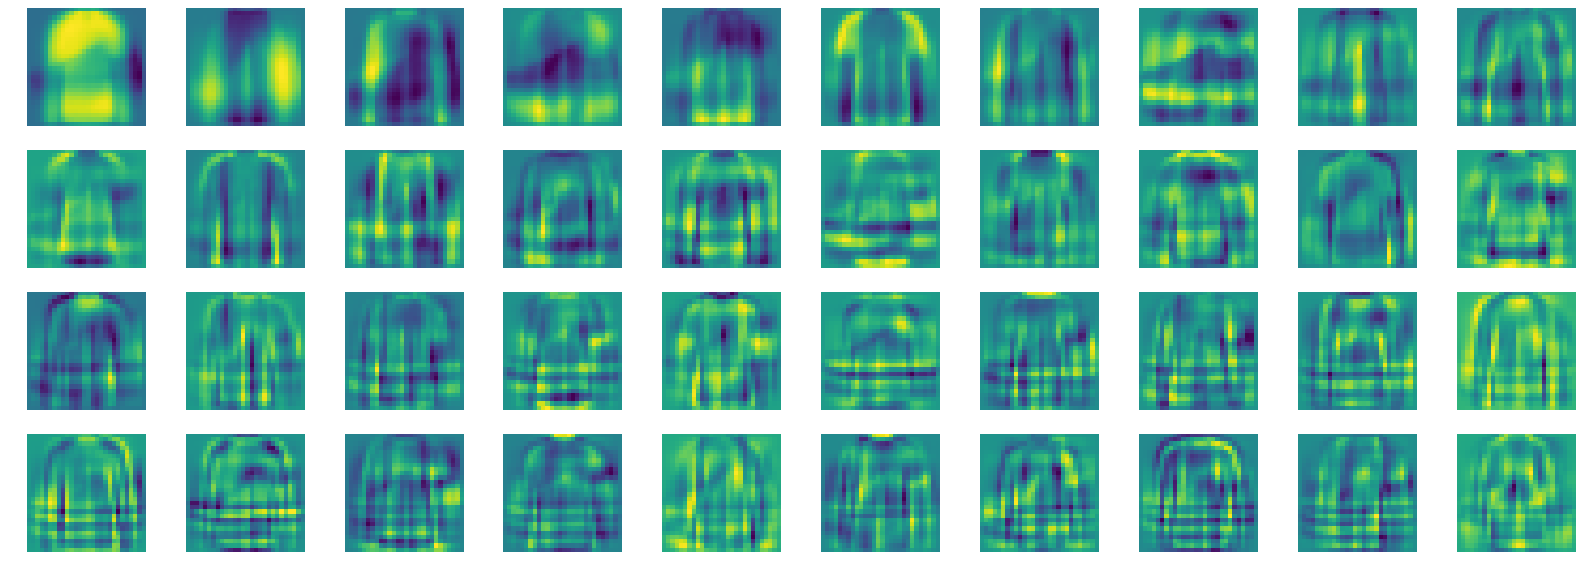

In [72]:
plt.figure(figsize=(28,10))
for k in range(40):
    plt.subplot(4,10,k+1)
    plt.imshow(pca.components_[k].reshape(28,28))
    plt.axis('off')

0kay so now we have all the principal components k. To figure out how many to keep now, one would have to calculate the variation of each and plot that on a cumulative addition graph vs. the principal component number. Take the k that has reached a sufficiently high % of the total variation. That is the variance explained by each dimension, pca.explained_variance_ratio_.

Text(0, 0.5, 'Cumulative percentage of variance explained')

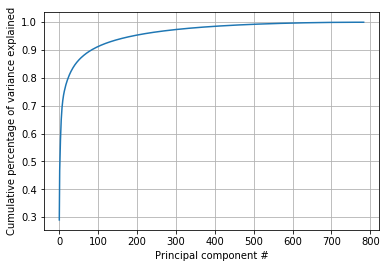

In [57]:
exp_var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(exp_var_cum.size), exp_var_cum)
plt.grid()
plt.xlabel("Principal component #")
plt.ylabel("Cumulative percentage of variance explained")

Okay let's zoom in on this cumulative variance graph and see what components fall into the higher percentage area.

(0.9, 1.0)

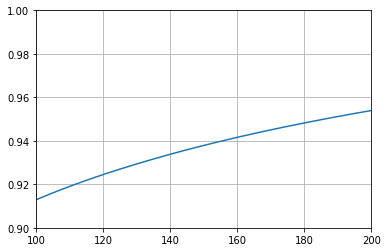

In [60]:
plt.plot(range(exp_var_cum.size), exp_var_cum)
plt.grid()
plt.xlim(100,200)
plt.ylim(0.9, 1.0)

For the principal components used to reduce the dimensions, we will use k=120 and thus be just over 92% of the dimensions accounting for all the variation in the data. To regenerate these images, we have to fit the PCA to the training data with the newly decided value of k. Then we want to transform the test data with the pca and then inverse transform it?

In [71]:
pca = PCA(n_components = 120, random_state=0, whiten=True)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

x_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So. Because the training and test data was originally extracted using dataframes for convenience, they must be turned into a reshapable type if we want to image them, specifically into a numpy.ndarray.

In [89]:
x_test_array = np.ndarray(x_test.shape)
x_test_array = x_test.values

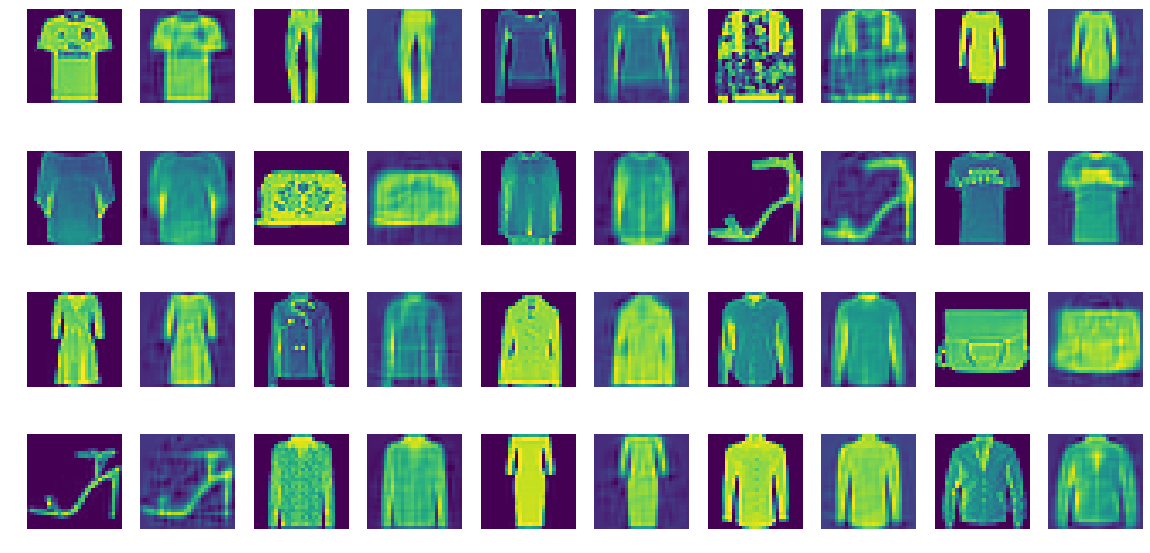

In [94]:
x_reconstructed_pca = pca.inverse_transform(x_test_pca)

plt.figure(figsize=(20,10))
for k in range(20):
    plt.subplot(4, 10, k*2 + 1)
    plt.imshow(x_test_array[k].reshape(28,28))
    plt.axis('off')
    plt.subplot(4, 10, k*2 + 2)
    plt.imshow(x_reconstructed_pca[k].reshape(28,28))
    plt.axis('off')





NMF
Lots of details are lost, we shall try to reconstruct them with NMF or wtvr. Loading NMF from sklearn, we have to select the number of components to use with the decomposition, as well as the training size we want to use to fit the nmf (optional; you can use the full training data set as well).

In [ ]:
NMF_TRAIN_SIZE = 100000   # Actually the size of our data set already, but can be varied

from sklearn.decomposition import NMF
nmf = NMF(n_components=120, random_state=0)
nmf.fit(x_train)    # The selection of the amount of data was taken out from nmf.fit(x_train[:NMF_TRAIN_SIZE]), since we're using all the data